# Machine Learning - Andrew Ng ( Python Implementation)

## Regularized Linear Regression

### Loading the data

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import sys

In [57]:
# Use loadmat to load matlab files
mat=loadmat("ex5data1.mat")

In [58]:
sorted(mat.keys())

['X',
 'Xtest',
 'Xval',
 '__globals__',
 '__header__',
 '__version__',
 'y',
 'ytest',
 'yval']

In [110]:
X=mat['X']
y=mat['y']
xtest=mat["Xtest"]
ytest=mat["ytest"]
Xval=mat['Xval']
yval=mat["yval"]

### Plot the data

Text(0.5, 1.0, 'X vs y')

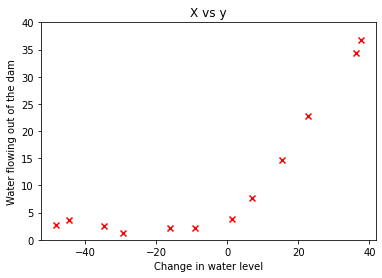

In [111]:
plt.scatter(X,y,marker="x",color='r')
plt.xlabel("Change in water level")
plt.ylim(0,40)
plt.ylabel("Water flowing out of the dam")
plt.title("X vs y")

### Compute the Regularized Linear Regression Cost Function

$J(\Theta) = \frac{1}{2m} (\sum_{i=1}^m(h_\Theta(x^{(i)}) - y^{(i)})^2) + \frac{\lambda}{2m}(\sum_{j=1}^n \Theta_j^2)$

In [112]:
def linearRegCostFunction(X, y,theta, Lambda):
    m=len(y)
    
    prediction= X @ theta
    error= prediction - y
    cost=1/(2*m) * np.sum(error** 2)
    reg_cost=cost + Lambda/(2 * m)*np.sum(theta[1:]**2)
    
    # compute the gradient
    grad_0= 1/m * X.T @ error
    grad_1=1/m * X.T @ error + Lambda/(m)*theta
    grad= np.vstack((grad_0[0],grad_1[1:]))
    
    return reg_cost,grad

In [113]:
#intialize x, y theta, lambda
m=X.shape[0]
X_1=np.hstack((np.ones((m,1)),X))
theta=np.ones((2,1))
Lambda=0.1

cost,gradient= linearRegCostFunction(X_1,y,theta,Lambda)
print("Cost at theta :",cost)
print("Gradient at theta ",gradient)

Cost at theta : 303.95569222026427
Gradient at theta  [[-15.30301567]
 [598.17574417]]


In [114]:
theta.shape
X_1.shape

(12, 2)

###  Fitting Liner Regression

In [115]:
#Calculate Gradient

def gradientDescent(X,y,theta,alpha,iters,Lambda):
    
    m=len(y)
    J_history= []
    
    for i in range(iters):
        cost,gradient=linearRegCostFunction(X,y,theta,Lambda)
        theta = theta - (alpha*gradient)
        J_history.append(cost)
        
    return theta,J_history

In [116]:
# #we set regularization parameter  to zero. Because our
# current implementation of linear regression is trying to t a 2-dimensional ,
# regularization will not be incredibly helpful for a  of such low dimension.

Lambda=0
theta=np.zeros((2,1))
theta,J_history=gradientDescent(X_1,y,theta,0.001,4000,Lambda)

In [117]:
theta

array([[12.81756012],
       [ 0.36615787]])

Text(0.5, 1.0, 'Cost function using Gradient Descent')

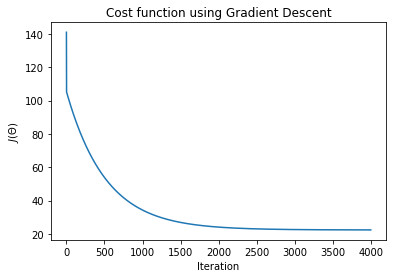

In [118]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [119]:
def trainLinearReg(X,theta,Lambda):
    y_predict= X @ theta
    
    return y_predict


In [120]:
y_prediction=trainLinearReg(X_1,theta,Lambda)

Text(0.5, 1.0, 'X vs y')

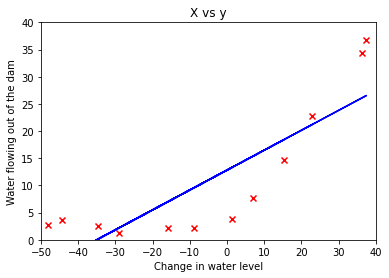

In [121]:
plt.scatter(X,y,marker="x",color='r')
plt.plot(X,y_prediction,c='blue')
plt.xlabel("Change in water level")
plt.ylim(0,40)
plt.xlim(-50,40)
plt.ylabel("Water flowing out of the dam")
plt.title("X vs y")

### Learning Curves

In [124]:
validation_set=pd.DataFrame([Xval.reshape((21,)),yval.reshape((21,))]).T

In [125]:
validation_set.head()#Just for manual visualization perpose

,0,1
0,-16.746536,4.170202
1,-14.577471,4.067263
2,34.515759,31.873068
3,-47.010076,10.623656
4,36.975119,31.836021


In [127]:
Xval_1=np.hstack((np.ones((21,1)),Xval))

In [74]:
def learningCurve(X,y,Xval,yval,Lambda):
    
    m=len(y)
    n=X.shape[1]
    error_train,error_val=[],[]
    
    for i in range(1,m+1):
        theta=gradientDescent(X[0:i,:],y[0:i,:],np.zeros((n,1)),0.001,3000,Lambda)[0]
        error_train.append(linearRegCostFunction(X[0:i,:],y[0:i,:],theta,Lambda)[0])
        error_val.append(linearRegCostFunction(Xval,yval,theta,Lambda)[0])
        #print(theta)
    
    return error_train,error_val
    

In [75]:
#def learningCurve(X, y, Xval, yval, Lambda):
    """
    Returns the train and cross validation set errors for a learning curve
    """
    m=len(y)
    n=X.shape[1]
    err_train, err_val = [],[]
    
    for i in range(1,m+1):
        theta = gradientDescent(X[0:i,:],y[0:i,:],np.zeros((n,1)),0.001,3000,Lambda)[0]
        err_train.append(linearRegCostFunction(X[0:i,:], y[0:i,:], theta, Lambda)[0])
        err_val.append(linearRegCostFunction(Xval, yval, theta, Lambda)[0])
        #print(theta)
    return err_train, err_val

IndentationError: unexpected indent (<ipython-input-75-64e5b613d515>, line 2)

In [128]:
Lambda=0
Training_error,validation_error=learningCurve(X_1,y,Xval_1,yval,Lambda)

In [129]:
X.shape

(12, 1)

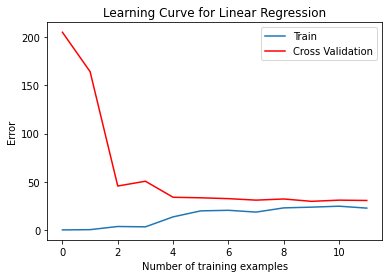

In [130]:
plt.plot(range(12),Training_error,label="Train")
plt.plot(range(12),validation_error,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()

In [131]:
print("#Training ex 1 \t \t Training error \t \t validation error")
for i in range(1,13):
    print(" \t {0} \t \t {1} \t \t {2} \n".format(i,Training_error[i-1],validation_error[i-1]))

#Training ex 1 	 	 Training error 	 	 validation error
 	 1 	 	 9.860761315262648e-32 	 	 205.1210957454735 

 	 2 	 	 0.26667458269926014 	 	 164.2535605474932 

 	 3 	 	 3.548185635907084 	 	 45.54817576824285 

 	 4 	 	 3.1874889363749985 	 	 50.52763121765736 

 	 5 	 	 13.54362450791914 	 	 33.8818916785026 

 	 6 	 	 19.77082269208633 	 	 33.33501763960231 

 	 7 	 	 20.35490053770414 	 	 32.44949025865311 

 	 8 	 	 18.491367932249474 	 	 30.897434817077908 

 	 9 	 	 22.864926631607066 	 	 32.092911163044654 

 	 10 	 	 23.624561039168142 	 	 29.654014029816686 

 	 11 	 	 24.604608486625352 	 	 30.890073919404443 

 	 12 	 	 22.620437267861497 	 	 30.554053720180832 



### Polynomial Regression

In [132]:
from sklearn.preprocessing import StandardScaler
def polyFeatures(X,p):
    
    for i in range(2,p+1):
        X=np.hstack((X,(X[:,0]**i)[:,np.newaxis]))
    
    return X

In [133]:
sc_x=StandardScaler()
poly_X=polyFeatures(X,8)
poly_X=sc_x.fit_transform(poly_X)
poly_X=np.hstack((np.ones((poly_X.shape[0],1)),poly_X))

In [134]:
Lambda=0
theta=np.zeros((9,1))
theta_train,J_history_poly=gradientDescent(poly_X,y,theta,0.3,20000,Lambda)

In [137]:
poly_y=trainLinearReg(poly_X,theta_train,Lambda)

Text(0.5, 1.0, 'X vs y')

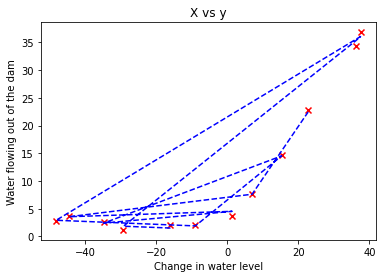

In [139]:
plt.scatter(X,y,marker="x",color='r')
plt.plot(X,poly_y,"--",c='blue')
plt.xlabel("Change in water level")
# plt.ylim(-60,60)
# plt.xlim(-80,80)
plt.ylabel("Water flowing out of the dam")
plt.title("X vs y")

In [92]:
poly_X_test=polyFeatures(x_test,8)
poly_X_test=sc_x.transform(poly_X_test)
poly_X_test=np.hstack((np.ones((poly_X_test.shape[0],1)),poly_X_test))

In [140]:
poly_X_val=polyFeatures(Xval,8)
poly_X_val=sc_x.transform(poly_X_val)
poly_X_val=np.hstack((np.ones((poly_X_val.shape[0],1)),poly_X_val))

In [142]:
x_value=np.linspace(-55,65,2400)

# Map the X values and normalize
x_value_poly = polyFeatures(x_value[:,np.newaxis], 8)
x_value_poly = sc_x.transform(x_value_poly)
x_value_poly = np.hstack((np.ones((x_value_poly.shape[0],1)),x_value_poly))
y_val= x_value_poly @ theta_train

Text(0.5, 1.0, 'X vs y')

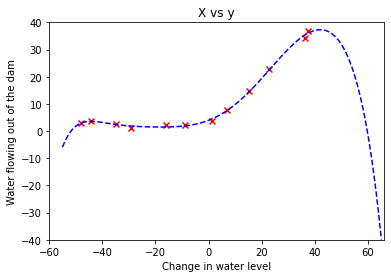

In [165]:
plt.scatter(X,y,marker="x",color='r')
plt.plot(x_val,y_val_poly,"--",c='blue')
plt.xlabel("Change in water level")
plt.ylim(-40,40)
plt.xlim(-60,66)
plt.ylabel("Water flowing out of the dam")
plt.title("X vs y")

In [150]:
error_train,error_val=learningCurve(poly_X, y, poly_X_val,yval,Lambda)

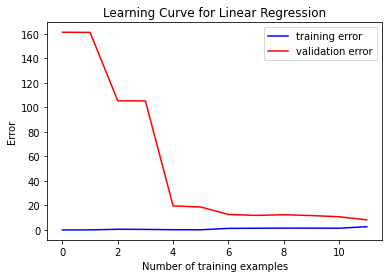

In [152]:
plt.plot(range(12),error_train,color='blue',label="training error")
plt.plot(range(12),error_val,color='red',label="validation error")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()

In [ ]:
### Polynomial regression with lambda = 100

In [155]:
Lambda=100
theta=np.zeros((9,1))
theta_train,J_history_poly=gradientDescent(poly_X,y,theta,0.1,20000,Lambda)

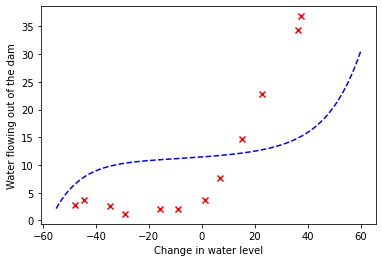

In [177]:
plt.scatter(X,y,marker='x',color='red')
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
X_value=np.linspace(-55,60,2400)

X_value_poly=polyFeatures(X_value[:,np.newaxis],8)
X_value_poly=sc_x.transform(X_value_poly)
X_value_poly=np.hstack((np.ones((X_value_poly.shape[0],1)),X_value_poly))
#x_value_poly = np.hstack((np.ones((x_value_poly.shape[0],1)),x_value_poly))
y_value=X_value_poly @ theta_train
plt.plot(X_value,y_value,"--",color='blue')

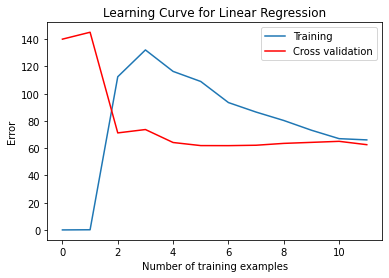

In [178]:
error_train,error_val=learningCurve(poly_X, y, poly_X_val,yval,Lambda)
plt.plot(range(12),error_train,label="Training")
plt.plot(range(12),error_val,label="Cross validation",color='red')
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()